In [1]:
import numpy as np
np.version.full_version

ModuleNotFoundError: No module named 'numpy'

In [3]:
a = np.array([0, 1, 2, 3, 4, 5])
a

array([0, 1, 2, 3, 4, 5])

In [4]:
a.ndim

1

In [5]:
a.shape

(6,)

In [6]:
b = a.reshape((3, 2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [7]:
b.ndim

2

In [8]:
b.shape

(3, 2)

In [14]:
b[1][0] = 77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [15]:
a

array([ 0,  1, 77,  3,  4,  5])

In [17]:
c = a.reshape((3, 2)).copy()
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [18]:
c[0][0] = -99
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

In [19]:
a

array([ 0,  1, 77,  3,  4,  5])

In [20]:
d = np.array([1, 2, 3, 4, 5])
d*2

array([ 2,  4,  6,  8, 10])

In [21]:
d**2

array([ 1,  4,  9, 16, 25])

In [26]:
[1, 2, 3, 4, 5]*2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [28]:
a[np.array([2, 3, 4])]

array([77,  3,  4])

In [29]:
a > 4

array([False, False,  True, False, False,  True])

In [30]:
a[a>4]

array([77,  5])

In [31]:
a[a>4] = 4
a

array([0, 1, 4, 3, 4, 4])

In [38]:
a.clip(0, 4)

array([0, 1, 4, 3, 4, 4])

In [39]:
c = np.array([1, 2, np.NAN, 3, 4])
c

array([ 1.,  2., nan,  3.,  4.])

In [40]:
np.isnan(c)

array([False, False,  True, False, False])

In [41]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [42]:
np.mean(c[~np.isnan(c)])

2.5

In [52]:
import timeit

normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))',
                              number=10000)

naive_np_sec = timeit.timeit('sum(na*na)',
                             setup="import numpy as np; na=np.arange(1000)",
                             number=10000)

good_np_sec = timeit.timeit('na.dot(na)',
                            setup="import numpy as np; na=np.arange(1000)",
                            number=10000)

print(f"Normal Python: {normal_py_sec} sec")
print(f"Naive NumPy: {naive_np_sec} sec")
print(f"Good NumPy: {good_np_sec} sec")

Normal Python: 0.4748094299998229 sec
Naive NumPy: 1.0315542260000257 sec
Good NumPy: 0.010350252999842269 sec


In [53]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [54]:
np.array([1, "stringy"])

array(['1', 'stringy'], dtype='<U21')

In [57]:
np.array([1, "stringy", set([1, 2, 3])])

array([1, 'stringy', {1, 2, 3}], dtype=object)

In [63]:
import scipy 
import numpy
scipy.version.full_version

'1.6.1'

In [64]:
scipy.dot is numpy.dot

False

In [66]:
data = scipy.genfromtxt("./data/web_traffic.tsv", delimiter="\t")
data[:10]

<ipython-input-66-c1f7ca9b8390>:1: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  data = scipy.genfromtxt("./data/web_traffic.tsv", delimiter="\t")


array([[1.000e+00, 2.272e+03],
       [2.000e+00,       nan],
       [3.000e+00, 1.386e+03],
       [4.000e+00, 1.365e+03],
       [5.000e+00, 1.488e+03],
       [6.000e+00, 1.337e+03],
       [7.000e+00, 1.883e+03],
       [8.000e+00, 2.283e+03],
       [9.000e+00, 1.335e+03],
       [1.000e+01, 1.025e+03]])

In [67]:
data.shape

(743, 2)

In [68]:
x = data[:, 0]
y = data[:, 1]

In [73]:
np.sum(np.isnan(y))

8

In [74]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

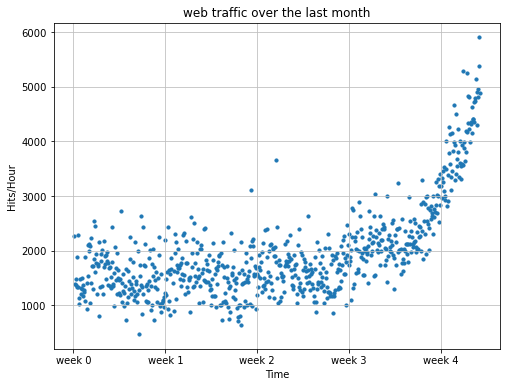

In [300]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x, y, s=10)  # s is the dot size

plt.title("web traffic over the last month")

plt.xlabel("Time")
plt.ylabel("Hits/Hour")

plt.xticks([w*7*24 for w in range(5)],
           ['week %i' % w for w in range(5)])

# plt.autoscale(tight=True)

plt.grid(True, linestyle='-', color='0.75')

In [83]:
def error(f, x, y):
    return np.sum((f(x)-y)**2)

In [93]:
fp1, residuals, rank, sv, rcond = scipy.polyfit(x, y, 
                                                1,  # the desired order of the polynomial
                                                full=True)

<ipython-input-93-07116adce27f>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fp1, residuals, rank, sv, rcond = scipy.polyfit(x, y,


In [94]:
print(f"Model parameters : {fp1}")
print(f"Residuals : {residuals}")

Model parameters : [  2.59619213 989.02487106]
Residuals : [3.17389767e+08]


In [95]:
f1 = scipy.poly1d(fp1)
print(error(f1, x, y))

317389767.33977807


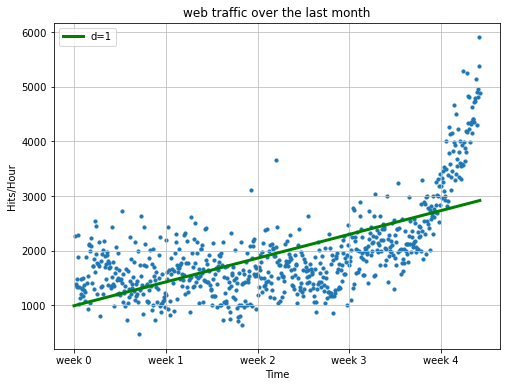

In [301]:
labels = []

fx = np.linspace(0, x[-1], 1000) # generate X-values for plotting
ax.plot(fx, f1(fx), linewidth=3, c="green")
labels.append("d=%i" % f1.order)

ax.legend(labels, loc="upper left")
fig
# plt.show()

In [117]:
f2p = scipy.polyfit(x, y, 2)
f2p

<ipython-input-117-1bfebe113e54>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  f2p = scipy.polyfit(x, y, 2)


array([ 1.05322215e-02, -5.26545650e+00,  1.97476082e+03])

In [119]:
f2 = scipy.poly1d(f2p)
print(error(f2, x, y))

179983507.8781792


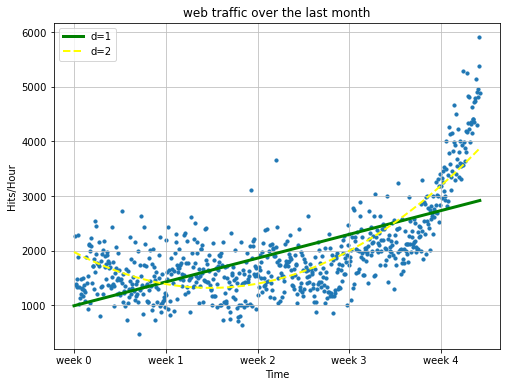

In [302]:
ax.plot(fx, f2(fx), linestyle="--", linewidth=2, c="yellow")
labels.append("d=%i" % f2.order)

ax.legend(labels, loc="upper left")
fig

In [228]:
fnp = []
for idx, degree in enumerate([3, 10, 100]):
    fnp.append(scipy.poly1d(scipy.polyfit(x, y, degree)))
    print(f"error for degree {fnp[idx].order} is : {error(fnp[idx], x, y)}")

error for degree 3 is : 139350144.03172526
error for degree 10 is : 121942326.3635353
error for degree 53 is : 109452405.5432376


<ipython-input-228-5ed2d2d5af64>:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fnp.append(scipy.poly1d(scipy.polyfit(x, y, degree)))
<ipython-input-228-5ed2d2d5af64>:3: RankWarning: Polyfit may be poorly conditioned
  fnp.append(scipy.poly1d(scipy.polyfit(x, y, degree)))


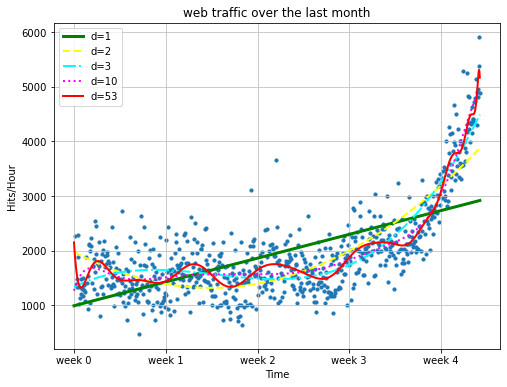

In [303]:
colors = ["cyan", "magenta", "red"]
l_style = ["-.", "dotted", '-']
for fn,c,ls in zip(fnp, colors, l_style):
    labels.append("d=%i" % fn.order)
    ax.plot(fx, fn(fx), linestyle=ls, linewidth=2, c=c)

ax.legend(labels, loc="upper left")
fig

In [229]:
for idx, degree in enumerate([1, 2, 3, 10, 100]):
    func = scipy.poly1d(scipy.polyfit(x, y, degree))
    print(f"error for degree {func.order} is : {error(func, x, y)}")

error for degree 1 is : 317389767.33977807
error for degree 2 is : 179983507.8781792
error for degree 3 is : 139350144.03172526
error for degree 10 is : 121942326.3635353
error for degree 53 is : 109452405.5432376


<ipython-input-229-f7cac5cd44bd>:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  func = scipy.poly1d(scipy.polyfit(x, y, degree))
<ipython-input-229-f7cac5cd44bd>:2: RankWarning: Polyfit may be poorly conditioned
  func = scipy.poly1d(scipy.polyfit(x, y, degree))


In [219]:
inflection = int(3.5*7*24) # calculate the inflection point in hours
inflection

588

In [223]:
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]

xb = x[inflection:] # data after
yb = y[inflection:]

fa = scipy.poly1d(scipy.polyfit(xa, ya, 1))
fb = scipy.poly1d(scipy.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)

print(f"Error inflection = {fa_error + fb_error}")

Error inflection = 132950348.19761638


<ipython-input-223-de8cde67f9fa>:7: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fa = scipy.poly1d(scipy.polyfit(xa, ya, 1))
<ipython-input-223-de8cde67f9fa>:8: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fb = scipy.poly1d(scipy.polyfit(xb, yb, 1))


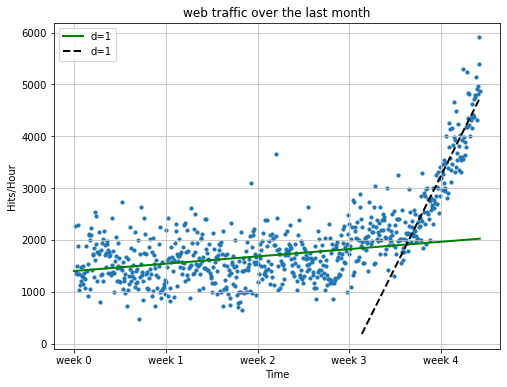

In [338]:
fig2, ax2 = plt.subplots(figsize=(8, 6))
labels2 = []

ax2.scatter(x, y, s=10)  # s is the dot size

plt.title("web traffic over the last month")

plt.xlabel("Time")
plt.ylabel("Hits/Hour")

plt.xticks([w*7*24 for w in range(10)],
           ['week %i' % w for w in range(10)])

# plt.autoscale(tight=True)

fxa = np.linspace(0, xb[-1], 1000) # generate X-values for plotting
fxb = np.linspace(xa[-70], xb[-1], 1000) # generate X-values for plotting

ax2.plot(fxa, fa(fxa), linewidth=2, c="green")
labels2.append("d=%i" % fa.order)

ax2.plot(fxb, fb(fxb), linestyle="--", linewidth=2, c="black")
labels2.append("d=%i" % fb.order)

ax2.legend(labels2, loc="upper left")

plt.grid(True, linestyle='-', color='0.75')

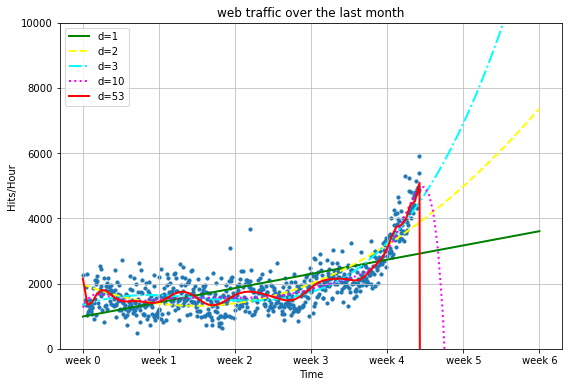

In [299]:
fig3, ax3 = plt.subplots(figsize=(9, 6))

ax3.scatter(x, y, s=10)  # s is the dot size

plt.title("web traffic over the last month")

plt.xlabel("Time")
plt.ylabel("Hits/Hour")

labels3 = []

# generate X-values for plotting up to 6 weeks
fx = np.linspace(0, 6 * 7 * 24, 100) 

ax3.plot(fx, f1(fx), linewidth=2, c="green")
labels3.append("d=%i" % f1.order)

ax3.plot(fx, f2(fx), linestyle="--", linewidth=2, c="yellow")
labels3.append("d=%i" % f2.order)

colors = ["cyan", "magenta", "red"]
l_style = ["-.", "dotted", '-']

for fn, c, ls in zip(fnp, colors, l_style):
    labels3.append("d=%i" % fn.order)
    ax3.plot(fx, fn(fx), linestyle=ls, linewidth=2, c=c)

ax3.legend(labels3, loc="upper left")

plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])

plt.ylim(ymin=0, ymax=10000)

plt.grid(True, linestyle='-', color='0.75')

In [328]:
fnp_b = []
for idx, degree in enumerate([1, 2, 3, 10, 100]):
    func = scipy.poly1d(scipy.polyfit(xb, yb, degree))
    fnp_b.append(func)
    print(f"error for degree {func.order} is : {error(func, xb, yb)}")

error for degree 1 is : 22143941.10761824
error for degree 2 is : 19768846.989176374
error for degree 3 is : 19766452.361026954
error for degree 10 is : 18949296.50598379
error for degree 53 is : 18300719.131142616


<ipython-input-328-7983f359fcd2>:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  func = scipy.poly1d(scipy.polyfit(xb, yb, degree))
<ipython-input-328-7983f359fcd2>:3: RankWarning: Polyfit may be poorly conditioned
  func = scipy.poly1d(scipy.polyfit(xb, yb, degree))
<ipython-input-328-7983f359fcd2>:3: RankWarning: Polyfit may be poorly conditioned
  func = scipy.poly1d(scipy.polyfit(xb, yb, degree))


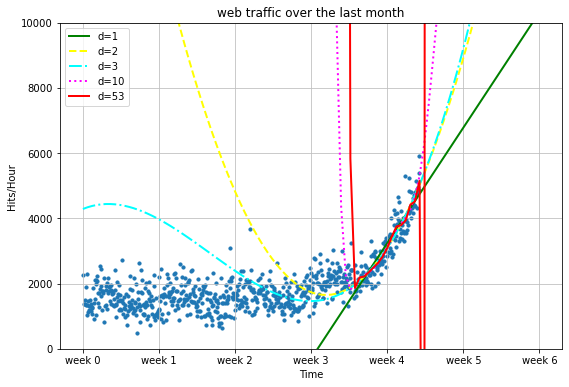

In [298]:
fig4, ax4 = plt.subplots(figsize=(9, 6))

ax4.scatter(x, y, s=10)  # s is the dot size

plt.title("web traffic over the last month")

plt.xlabel("Time")
plt.ylabel("Hits/Hour")

labels4 = []

# generate X-values for plotting up to 6 weeks
fx = np.linspace(0, 6 * 7 * 24, 100) 

colors = ["green", "yellow", "cyan", "magenta", "red"]
l_style = ["-", "--", "-.", "dotted", '-']

for fn, c, ls in zip(fnp_b, colors, l_style):
    labels4.append("d=%i" % fn.order)
    ax4.plot(fx, fn(fx), linestyle=ls, linewidth=2, c=c)

ax4.legend(labels4, loc="upper left")

plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])

plt.ylim(ymin=0, ymax=10000)

plt.grid(True, linestyle='-', color='0.75')

In [316]:
frac = 0.3
split_idx = int(frac * len(xb))
np.random.seed(3)
shuffled = np.random.permutation(list(range(len(xb))))
test_idx = sorted(shuffled[:split_idx])
train_idx = sorted(shuffled[split_idx:])

In [333]:
fnp_b_trained = []
for idx, degree in enumerate([1, 2, 3, 10, 100]):
    func = scipy.poly1d(scipy.polyfit(xb[train_idx], yb[train_idx], degree))
    fnp_b_trained.append(func)
    print(f"error for degree {func.order} is : {error(func, xb[test_idx], yb[test_idx])}")

error for degree 1 is : 6397694.3863941645
error for degree 2 is : 6010775.401243316
error for degree 3 is : 6047678.658525205
error for degree 10 is : 7037714.202747524
error for degree 53 is : 7052748.629774369


<ipython-input-333-a5950d358937>:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  func = scipy.poly1d(scipy.polyfit(xb[train_idx], yb[train_idx], degree))
<ipython-input-333-a5950d358937>:3: RankWarning: Polyfit may be poorly conditioned
  func = scipy.poly1d(scipy.polyfit(xb[train_idx], yb[train_idx], degree))
<ipython-input-333-a5950d358937>:3: RankWarning: Polyfit may be poorly conditioned
  func = scipy.poly1d(scipy.polyfit(xb[train_idx], yb[train_idx], degree))


**Note** : The model with degree 2 has the lowest test error,

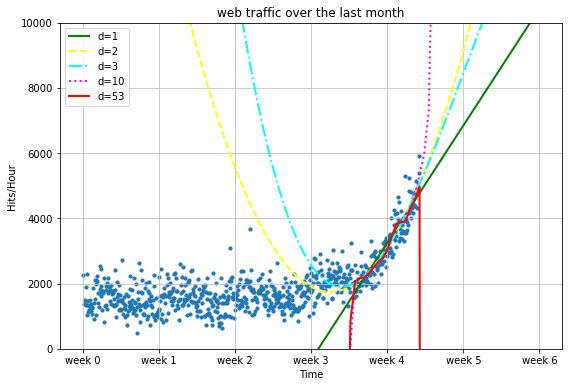

In [334]:
fig4, ax4 = plt.subplots(figsize=(9, 6))

ax4.scatter(x, y, s=10)  # s is the dot size

plt.title("web traffic over the last month")

plt.xlabel("Time")
plt.ylabel("Hits/Hour")

labels4 = []

# generate X-values for plotting up to 6 weeks
fx = np.linspace(0, 6 * 7 * 24, 100) 

colors = ["green", "yellow", "cyan", "magenta", "red"]
l_style = ["-", "--", "-.", "dotted", '-']

for fn, c, ls in zip(fnp_b_trained, colors, l_style):
    labels4.append("d=%i" % fn.order)
    ax4.plot(fx, fn(fx), linestyle=ls, linewidth=2, c=c)

ax4.legend(labels4, loc="upper left")

plt.xticks([w*7*24 for w in range(7)],
           ['week %i' % w for w in range(7)])

plt.ylim(ymin=0, ymax=10000)

plt.grid(True, linestyle='-', color='0.75')

In [346]:
fbt2 = scipy.poly1d(scipy.polyfit(xb[train_idx], yb[train_idx], 2))
print(f"fbt2(x)= \n{fbt2}")

fbt2(x)= 
       2
0.086 x - 94.02 x + 2.744e+04


<ipython-input-346-456e80bd15d5>:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fbt2 = scipy.poly1d(scipy.polyfit(xb[train_idx], yb[train_idx], 2))


In [347]:
print(f"fbt2(x) - 100,000= \n{fbt2 - 100000}")

fbt2(x) - 100,000= 
       2
0.086 x - 94.02 x - 7.256e+04


In [340]:
from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)
print(f"100,000 hits/hour expected at week {reached_max[0]}")

100,000 hits/hour expected at week 9.616070838432337
